# Random Forest Model Analysis

### Step 1: Import Libraries and Load Dataset

We start by importing all necessary libraries and loading the cleaned Uber dataset.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from google.colab import files
uploaded = files.upload()

Saving uber_cleaned.csv to uber_cleaned.csv


In [ ]:
import pandas as pd

df = pd.read_csv('uber_cleaned.csv')
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,trip_distance,pickup_hour,pickup_dayofweek
0,52:06.0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,1.68,19,Thursday
1,04:56.0,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2.46,20,Friday
2,45:00.0,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,5.04,21,Monday
3,22:21.0,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,1.66,8,Friday
4,47:00.0,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,4.48,17,Thursday


### Step 2: Select Features and Prepare Data

Next, we define our features and our target variable. We will be focusing on variables that were most relevant from our EDA: trip_distance, pickup_hour, passenger_count, and pickup_dayofweek.

Since pickup_dayofweek is a cateogorical variable, we will use one-hot encoding to convert it into a numerical form.

In [ ]:
df_encoded = pd.get_dummies(df, columns = ['pickup_dayofweek'], drop_first = True)

feature_cols = ['trip_distance', 'pickup_hour', 'passenger_count'] + [col for col in df_encoded.columns if col.startswith('pickup_dayofweek_')]

X = df_encoded[feature_cols]
y = df_encoded['fare_amount']

### Step 3: Train the Random Forest Model

Now, we will begin splitting our data into train and test sets to prepare for predictive modeling. We will be using an 80/20 ratio.

Then, we will train a Random Forest Regressor on the training data.

This model is great at capturing non-linear relationships and will help us identify the most important features that influence Uber fare prices.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

rf_model = RandomForestRegressor(n_estimators = 100, random_state = 42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

### Step 4: Evaluate Model Performance

Noow that our Random Forest model is trained, we will measure how well it performs on our test set.

We will be using three different methods:
- RMSE (Root Mean Squared Error)
- MAE (Mean Absolute Error)
- R^2 (R-Squared)



In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: ${rmse:.2f}")
print(f"MAE: ${mae:.2f}")
print(f"R2 Score: {r2:.3f}")

RMSE: $4.59
MAE: $2.54
R2 Score: 0.763


These results suggest that the model is able to predict Uber fare amounts with good accuracy.

On average, the model's predicted fare is within roughly $2.54 of the actual value, and it explains about 76.3% of the variance in fare prices.

This level of performance confirms that the selected features, trip_distance, pickup_hour, and pickup_dayofweek, contain strong predictive power!

### Step 5: Feature Importance Visualization

Random Forest models let us see which variables had the biggest impact on predictions. We will display a bar chart of the top contributing feautes too understand which ones influence fares the most.

<ipython-input-15-3045620034>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_imp_df.head(10), x='Importance', y='Feature', palette='crest')


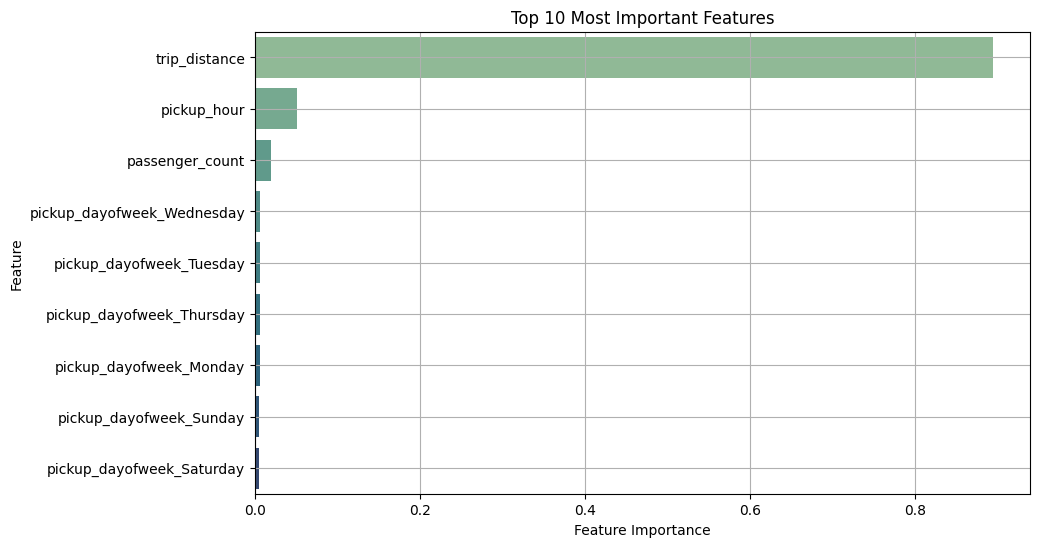

In [ ]:
importances = rf_model.feature_importances_
feature_names = X.columns

feature_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_imp_df = feature_imp_df.sort_values(by = 'Importance', ascending = False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_imp_df.head(10), x='Importance', y='Feature', palette='crest')
plt.title('Top 10 Most Important Features')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.grid(True)
plt.show()



The bar chart above shows the features that influence fare prediction the most. As we observe, we notice that trip_distance is by far the most important feature. This aligns with our hypotheses. It contributes to over 90% of the decision-making power in this model.

This confirms that the length of a ride is the strongest driver of fare amount.

Pickup_hour still has some effect to it as well. It captures that there are also some time-based demand patterns that exist at Uber.

### Step 6: Predicted vs Actual Fare Plot

This scatter plot compares the model's predicted fare amounts to the actual fares from the test set. Most of the points cluster around the red diagonal line, which indicates accurate predictions.

The model performs well for the majority of fares ubder $60, but we do notice increased variance and under-prediction for higer fares. This coud be due to unmodeled factors like traffic conditions or surge pricing.


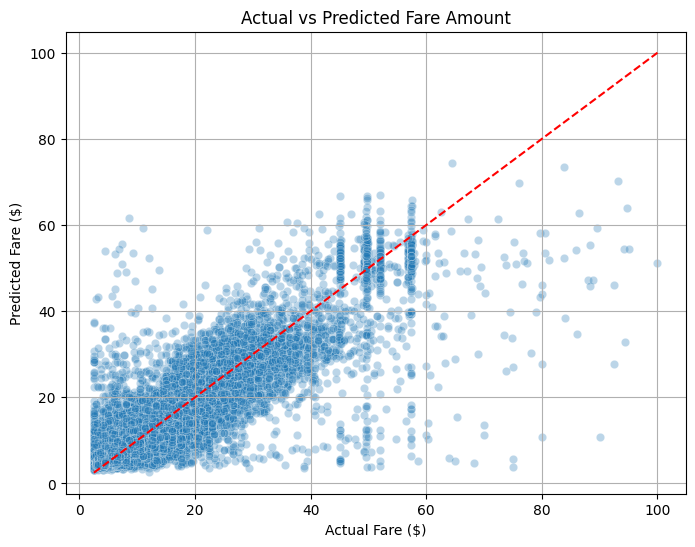

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.3)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # reference line
plt.title('Actual vs Predicted Fare Amount')
plt.xlabel('Actual Fare ($)')
plt.ylabel('Predicted Fare ($)')
plt.grid(True)
plt.show()

### Conclusion

Based on our Exploratory Data Analysis and modeling, we found that trip_distance is by far the most influential factor in predicting Uber fare. Time-based features, such as pickup_hour and pickup_dayofweek, added some predictive value. Passenger_count had aa minor effect on our analysis.

Using a Random Forest Regression model, we achieved an RMSE of $4.59, an MAE of $2.54 and an R^2 Score of 76.3%. these metrics indicate that our model performs well, accurately predicting fares for the majority of trips!

This analysis supports the idea that fare prediction models should strongly prioritize distance. There is room for improvement to account for pricing irregularities and what might be causing those outliers.